In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [2]:
import dump
import numpy as np
from tqdm import tqdm

In [3]:
import Py_FTP_Langevin as ftp

In [4]:
k_B = 1.38066e-23    #! Boltzmann constant in (J/K)

# First time passage simulations

In [5]:
#//! *********** PARAMETERS PARTICLE PROPERTIES *********** !
MM = 28.9647  #;  //! Molecular weight of fluid molecules (kg/kmol)
Rho_p = 1800. #; //! PPs mass density
#Dp = 20e-09

#//! *********** SIMULATION PARAMETERS *********** !
N_runs = 100 #;
Box_L_factor_dmax = 50. #4 #; //! Box size as factor of D_p
T_g = 1700. #;            //! Fluid temperature
P_g = 101300. #;          //! Fluid pressure
phi_p = 0.01 / 100 #;   //! Particles number concentration (1000 ppm = 0.01)    
with_collisions = True
with_rel_motion = True
with_rotation = False

#//! *********** LANGEVIN PARAMETERS *********** !
run_taus_min = 120 #; // Keep in 100 to be accurate with LD theory (otherwise the 6*D*t is not strictly respected)
LD_dt_factor = 1e-03 #;

#//! *********** PARAMETERS INT. POTENTIALS *********** !
A = 0 #2.62e-19    #;    //! Hamaker constant (J) 2.38e-19
s_LJ = 0 #0.35e-09 #5.95e-10 #; //! LJ repulsive form parameter
alpha_dp = 0.01
factor_vdw = 1 #.05
direct = "/home/jose/Desktop/Gitlab/mitacs/mitacs_project/First_time_passage/FTP_Langevin_simulations/Simulations/aggregate_info";

In [6]:
model = ftp.Pymodel(direct)
model

In [7]:
Dp = np.logspace(np.log10(1),np.log10(1e+03),10) * (1e-09)

In [8]:
ftp.Init_Random()
ftp.Make_output_folder()

In [9]:
files = ftp.get_dir_files(direct)
N_files = len(files)

In [10]:
def isNaN(num):
    if float('-inf') < float(num) < float('inf'):
        return False 
    else:
        return True

In [11]:
model.Set_prop(MM,Rho_p,N_runs,Box_L_factor_dmax,
               T_g,P_g,phi_p,run_taus_min,LD_dt_factor,
               A,s_LJ,alpha_dp,factor_vdw,Dp[0],
               with_collisions,with_rel_motion,with_rotation,direct)

ftp_model = ftp.PyFTP(model)

path_agg = direct + "/" + files[0].decode('utf-8')
print(path_agg)

/home/jose/Desktop/Gitlab/mitacs/mitacs_project/First_time_passage/FTP_Langevin_simulations/Simulations/aggregate_info/Agglomerate_N_000000001_Agg_00000001.dat


In [12]:
ftp_times_j = np.zeros(len(Dp))
ftp_times_std_j = np.zeros(len(Dp))
Kn_d_j = np.zeros(len(Dp))
Kn_g_j = np.zeros(len(Dp))
tau_12_j = np.zeros(len(Dp))
L_j = np.zeros(len(Dp))
Rc_j = np.zeros(len(Dp))

In [13]:
for j in tqdm(range(len(Dp))):
    print("Analysis: ",j)
    model.Set_prop(MM,Rho_p,N_runs,Box_L_factor_dmax,
               T_g,P_g,phi_p,run_taus_min,LD_dt_factor,
               A,s_LJ,alpha_dp,factor_vdw,Dp[j],
               with_collisions,with_rel_motion,with_rotation,direct)
    ftp_model.Load_aggregates_external(path_agg, model)
    ftp_times = np.asarray([])
    
    for k in range(N_runs):
        ftp_model.Restart_ftp(model)
        #ftp_model.show_spheres()
        #if (k == 0):
        #    ftp.Show_parameters(spheres2, model)
        ftp_model.Move_2_origin()
        ftp_model.Random_init_location()
        #Export_current_sim(ftp_model,0,True)
        i=1
        it_exp = 1
        collision = False
        while(not collision):
            collision = ftp_model.run(model, 1)
            if(isNaN(ftp_model.t_res)):
                print("d_time ",ftp_model.d_time, " t_res ",ftp_model.t_res)
                break
        i += 1
        ftp_times = np.append(ftp_times, ftp_model.t_res)
    ftp_times_std_j[j] = np.std(ftp_times)
    ftp_times_j[j] = np.mean(ftp_times)
    tau_12_j[j] = ftp_model.Tau_ij
    Kn_d_j[j] = ftp_model.Kn_d_ij
    Kn_g_j[j] = ftp_model.Kn_g_avg
    L_j[j] = ftp_model.L_box
    Rc_j[j] = ftp_model.Rc

  0%|                                                                                         | 0/10 [00:00<?, ?it/s]

Analysis:  0


 10%|████████                                                                        | 1/10 [04:36<41:29, 276.56s/it]

Analysis:  1


 20%|████████████████                                                                | 2/10 [10:26<42:36, 319.52s/it]

Analysis:  2


 30%|████████████████████████                                                        | 3/10 [16:59<41:14, 353.46s/it]

Analysis:  3


 40%|████████████████████████████████                                                | 4/10 [24:30<39:10, 391.75s/it]

Analysis:  4


 50%|████████████████████████████████████████                                        | 5/10 [31:12<32:57, 395.53s/it]

Analysis:  5


 60%|████████████████████████████████████████████████                                | 6/10 [37:28<25:55, 388.92s/it]

Analysis:  6


 70%|████████████████████████████████████████████████████████                        | 7/10 [50:04<25:26, 508.97s/it]

Analysis:  7


 80%|██████████████████████████████████████████████████████████████▍               | 8/10 [1:11:08<24:58, 749.29s/it]

Analysis:  8


 90%|█████████████████████████████████████████████████████████████████████▎       | 9/10 [1:44:10<18:54, 1134.71s/it]

Analysis:  9


100%|████████████████████████████████████████████████████████████████████████████| 10/10 [2:57:36<00:00, 1065.60s/it]


In [14]:
import matplotlib.pyplot as plt

In [15]:
# Box size
V_box = np.power(L_j,3)

t_ij = ftp_times_j/tau_12_j

H = V_box/(np.power(Rc_j,3)*t_ij)

In [16]:
def H_function(Kn_d2):
    cc1 = 25.836
    cc2 = 11.211
    cc3 = 3.502
    cc4 = 7.211
    H_gop = (4.0*np.pi*pow(Kn_d2,2)+cc1*pow(Kn_d2,3)+
        np.sqrt(8.0*np.pi)*cc2*pow(Kn_d2,4))/(1.0+cc3*Kn_d2+
        cc4*pow(Kn_d2,2)+cc2*pow(Kn_d2,3))
    return H_gop

def H_diffusive(Kn_d2):
    H_d = 4*np.pi*pow(Kn_d2,2)
    return H_d

def H_ballistic(Kn_d2):
    H_b = np.sqrt(8*np.pi)*Kn_d2
    return H_b

In [24]:
Kn_d2 = np.logspace(np.log10(1e-02),np.log10(8e+02), 500)
H_theo = H_function(Kn_d2)

H_theo_d = H_diffusive(Kn_d2)
H_theo_b = H_ballistic(Kn_d2)

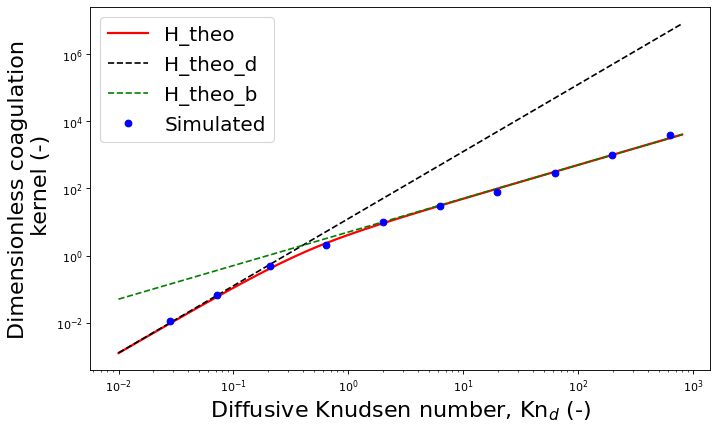

(<matplotlib.legend.Legend at 0x7fb86fdf01c0>, None)

In [25]:
fig, ax1 = plt.subplots(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax1.loglog(Kn_d2,H_theo,"-r", linewidth=2,label="H_theo")
ax1.loglog(Kn_d2,H_theo_d,"--k",label="H_theo_d")
ax1.loglog(Kn_d2,H_theo_b,"--g",label="H_theo_b")
ax1.loglog(Kn_d_j,H,"o b",label="Simulated")
ax1.set_xlabel('Diffusive Knudsen number, Kn$_d$ (-)', fontsize=20)
ax1.set_ylabel('Dimensionless coagulation\n kernel (-)', fontsize=20)
plt.legend(fontsize=18, loc=0), plt.show()

In [19]:
results_exp = np.column_stack((Kn_d_j,H,ftp_times_j,ftp_times_std_j,tau_12_j,Kn_g_j,
                              L_j,Rc_j,V_box,t_ij))

file_name = "data_out/validation_spheres_no_vdw.dat"
np.savetxt(file_name, results_exp, delimiter=",")